## DeepWalk (created from Randomwalk)

Randomwalk algorithm using `networx` and the `karateclub`library.

Jay Urbain, PhD

11/11/2022

Load the karate club graph using [networkx](https://networkx.org/).

In [15]:
import networkx as nx
G = nx.karate_club_graph() # load the Zachary's karate club graph
print("Number of nodes (club members)", len(G.nodes))

Number of nodes (club members) 34


Plot the graph:

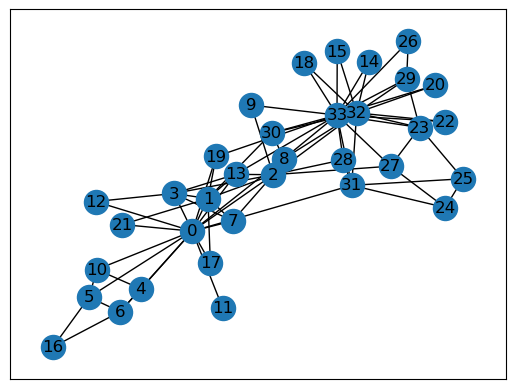

In [16]:
nx.draw_networkx(G)

Each node represents a participant. If the participants talk to each other, they have a relationship.

There are two types of labels or group memberships.

Plot the graph with labels:

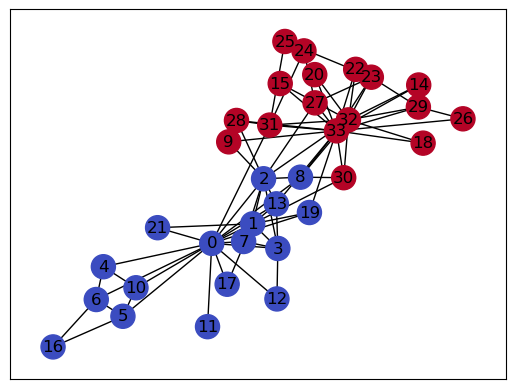

In [18]:
# plot the graph with labels
labels = []
for i in G.nodes:
    # Mr. Hi or Officer
    club_names = G.nodes[i]['club']
    # Numerically encode club name
    labels.append(1 if club_names == "Officer" else 0)
#print('labels', labels)  

# can choose different layout
layout_pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=layout_pos, node_color=labels, cmap='coolwarm')

Perform node embedding using the `Deepwalk` algorithm and the `karateclub` library.

Paper:   
[DeepWalk: Online Learning of Social Representations](https://arxiv.org/abs/1403.6652)

Karateclub library:    
https://karateclub.readthedocs.io/en/latest/notes/introduction.html

Karateclub DeepWalk reference:   
https://karateclub.readthedocs.io/en/latest/modules/root.html#karateclub.node_embedding.neighbourhood.deepwalk.DeepWalk

In [6]:
# Perform node embedding using the Deepwalk library in the karateclub library

from karateclub import DeepWalk, Node2Vec

# construct model - use Google  
Deepwalk_model = DeepWalk(walk_number=10, walk_length=80, dimensions=124)

# fit the model to the graph 
Deepwalk_model.fit(G)

# construct model. Make Node2Vec a little more biased for staying local  
Node2Vec_model = Node2Vec(walk_number=10, walk_length=80, p=0.6, q=0.4, dimensions=124)

# fit the model to the graph 
Node2Vec_model.fit(G)


In [7]:
# get learned embedding
embedding = Deepwalk_model.get_embedding()

node2Vec_embedding = Node2Vec_model.get_embedding()

How many nodes and how many features?     
-- 34 x 124

In [8]:
print('Embedding array shape (nodex x features)', embedding.shape)
print('Node2Vec Embedding array shape (nodex x features)', embedding.shape)

Embedding array shape (nodex x features) (34, 124)
Node2Vec Embedding array shape (nodex x features) (34, 124)


Plot lower dimensional representations of the data.

Can use [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) 
or [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
     

In [9]:
# Low dimensional plot of the nodes x features
import sklearn

PCA_model = sklearn.decomposition.PCA(n_components=2)
lowdimension_embedding = PCA_model.fit_transform( embedding )

node2vec_lowdimension_embedding = PCA_model.fit_transform( node2Vec_embedding )

Lower dimensional embedding should be the nuber of nodes x 2.

In [10]:
print('Low dimmensional embedding representation from (node x 2):', lowdimension_embedding.shape)

print('Low dimmensional node2vec embedding representation from (node x 2):', node2vec_lowdimension_embedding.shape)



Low dimmensional embedding representation from (node x 2): (34, 2)
Low dimmensional node2vec embedding representation from (node x 2): (34, 2)


Plot 2-d represention

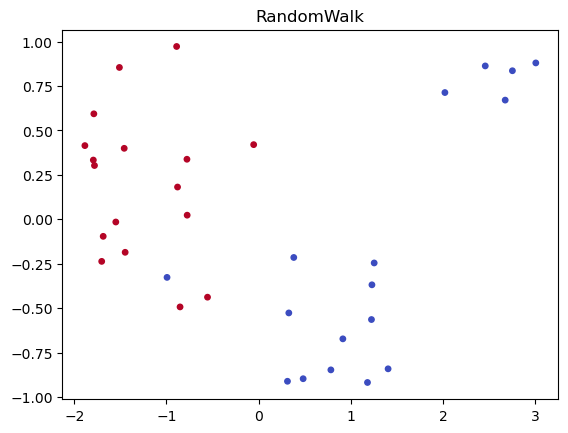

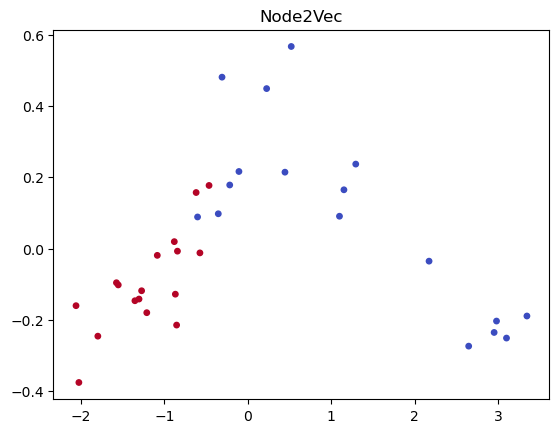

In [11]:
import matplotlib.pyplot as plt

plt.scatter(lowdimension_embedding[:,0], lowdimension_embedding[:,1], c=labels, s=15, cmap='coolwarm')
plt.title('RandomWalk')
plt.show()

plt.scatter(node2vec_lowdimension_embedding[:,0], node2vec_lowdimension_embedding[:,1], c=labels, s=15, cmap='coolwarm')
plt.title('Node2Vec')
plt.show()


After using Deepwalk we get a lower dimensional representation.

Now perform node classification.

Create train and test data.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

x_train, x_test, y_train, y_test = train_test_split(embedding, labels, test_size=0.3)
x_train, x_test


(array([[ 0.03241416, -0.11891714,  0.03788144, ...,  0.08780184,
         -0.09552877, -0.21169055],
        [ 0.1369674 , -0.00930948,  0.14626475, ..., -0.00059212,
         -0.02257554, -0.15714182],
        [-0.02345756, -0.21705087, -0.03553103, ...,  0.1848879 ,
         -0.14412086, -0.29006398],
        ...,
        [-0.14266662, -0.29908532, -0.14358552, ...,  0.27845663,
         -0.18335667, -0.32265928],
        [-0.14972799, -0.39995146, -0.20097536, ...,  0.3060937 ,
         -0.3046318 , -0.46245787],
        [ 0.04767199, -0.07704129,  0.12024696, ...,  0.08210004,
         -0.03238761, -0.18736513]], dtype=float32),
 array([[-0.00903515, -0.30241525, -0.1237467 , ...,  0.20050542,
         -0.30671474, -0.44997728],
        [ 0.1811711 ,  0.0201922 ,  0.18166766, ..., -0.0250276 ,
         -0.01033933, -0.11427633],
        [-0.07581118, -0.18555295, -0.05787624, ...,  0.15096514,
         -0.08256418, -0.1959421 ],
        ...,
        [-0.05145232, -0.309877  , -0.1

Fit the model to the data, i.e., the learned representations, using logistic regression.

In [25]:
ml_model = LogisticRegression(random_state=0).fit(x_train, y_train) 
y_predict = ml_model.predict(x_test)
ml_acc = roc_auc_score(y_test, y_predict)
print('AUC:', ml_acc)


AUC: 1.0


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

x_train, x_test, y_train, y_test = train_test_split(node2Vec_embedding, labels, test_size=0.3)
x_train, x_test

(array([[-0.0688576 ,  0.01227572, -0.09260811, ..., -0.00089812,
         -0.03250434, -0.18487991],
        [-0.16990858,  0.19865109, -0.26699275, ...,  0.11712612,
          0.16462296, -0.04965728],
        [ 0.19127724, -0.45214257,  0.2098672 , ..., -0.23130457,
         -0.54906034, -0.7005905 ],
        ...,
        [ 0.07399937, -0.35743418,  0.12361259, ..., -0.18295313,
         -0.4074283 , -0.579255  ],
        [-0.09634809, -0.12607165, -0.04307504, ..., -0.05905066,
         -0.1452098 , -0.24539265],
        [-0.11109265, -0.13887644, -0.06822944, ..., -0.08516516,
         -0.1497783 , -0.29905146]], dtype=float32),
 array([[-0.10602741,  0.08958338, -0.16597338, ...,  0.05556881,
          0.05060674, -0.11669626],
        [ 0.02064424, -0.23654543,  0.06778436, ..., -0.11590127,
         -0.26925552, -0.39037654],
        [-0.16921525,  0.24190652, -0.30399662, ...,  0.14379424,
          0.20405394, -0.04329124],
        ...,
        [-0.02022493, -0.23364271, -0.0

In [23]:
ml_model = LogisticRegression(random_state=0).fit(x_train, y_train) 
y_predict = ml_model.predict(x_test)
ml_acc = roc_auc_score(y_test, y_predict)
print('AUC:', ml_acc)

AUC: 0.875


Note: this is a relatively small and simple network.

Random walk with restart???

https://medium.com/@chaitanya_bhatia/random-walk-with-restart-and-its-applications-f53d7c98cb9